In [1]:
%cd ../
%config InlineBackend.figure_format='retina'

import logging

import seaborn as sns
from src.receptive_field.rf import ReceptiveField, gen_rf_rank_regional
from src.spikeloader import SpikeLoader

sns.set()
logging.getLogger().setLevel(logging.INFO)

/groups/stringer/home/josephs2/janelia2020


In [2]:
path_loader = "/groups/stringer/home/josephs2/data/text32_500_TX59_2020_08_18.hdf5"

In [3]:
# Parameters
path_npz = (
    "/groups/pachitariu/pachitariulab/datasets/v1RF/text32_500_TX57_2020_08_18.npz"
)
path_hdf5 = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"
path_img = "/groups/pachitariu/pachitariulab/data/STIM/text32_500.mat"
path_loader = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"
path_rf = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"
path_gabor = "/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5"


# Ridge Regression for Receptive Field

$\underbrace{Y}_{t×n} = \underbrace{X}_{t×px} \underbrace{β}_{px×n}$
where
- $t$: number of time points
- $n$: number of neurons
- $px$: number of pixels in each image (stimulus)

Solve for $\hat{β}$ where $\hat{β} = \arg\min_β ||Y-Xβ||_2 + λ||β||_2$.

dict_keys(['cls', 'path', 'load_prev_run', 'kwargs'])
<class 'src.spikeloader.SpikeLoader'>
/groups/stringer/home/josephs2/data/text32_500_TX57_2020_08_18.hdf5
True
{}


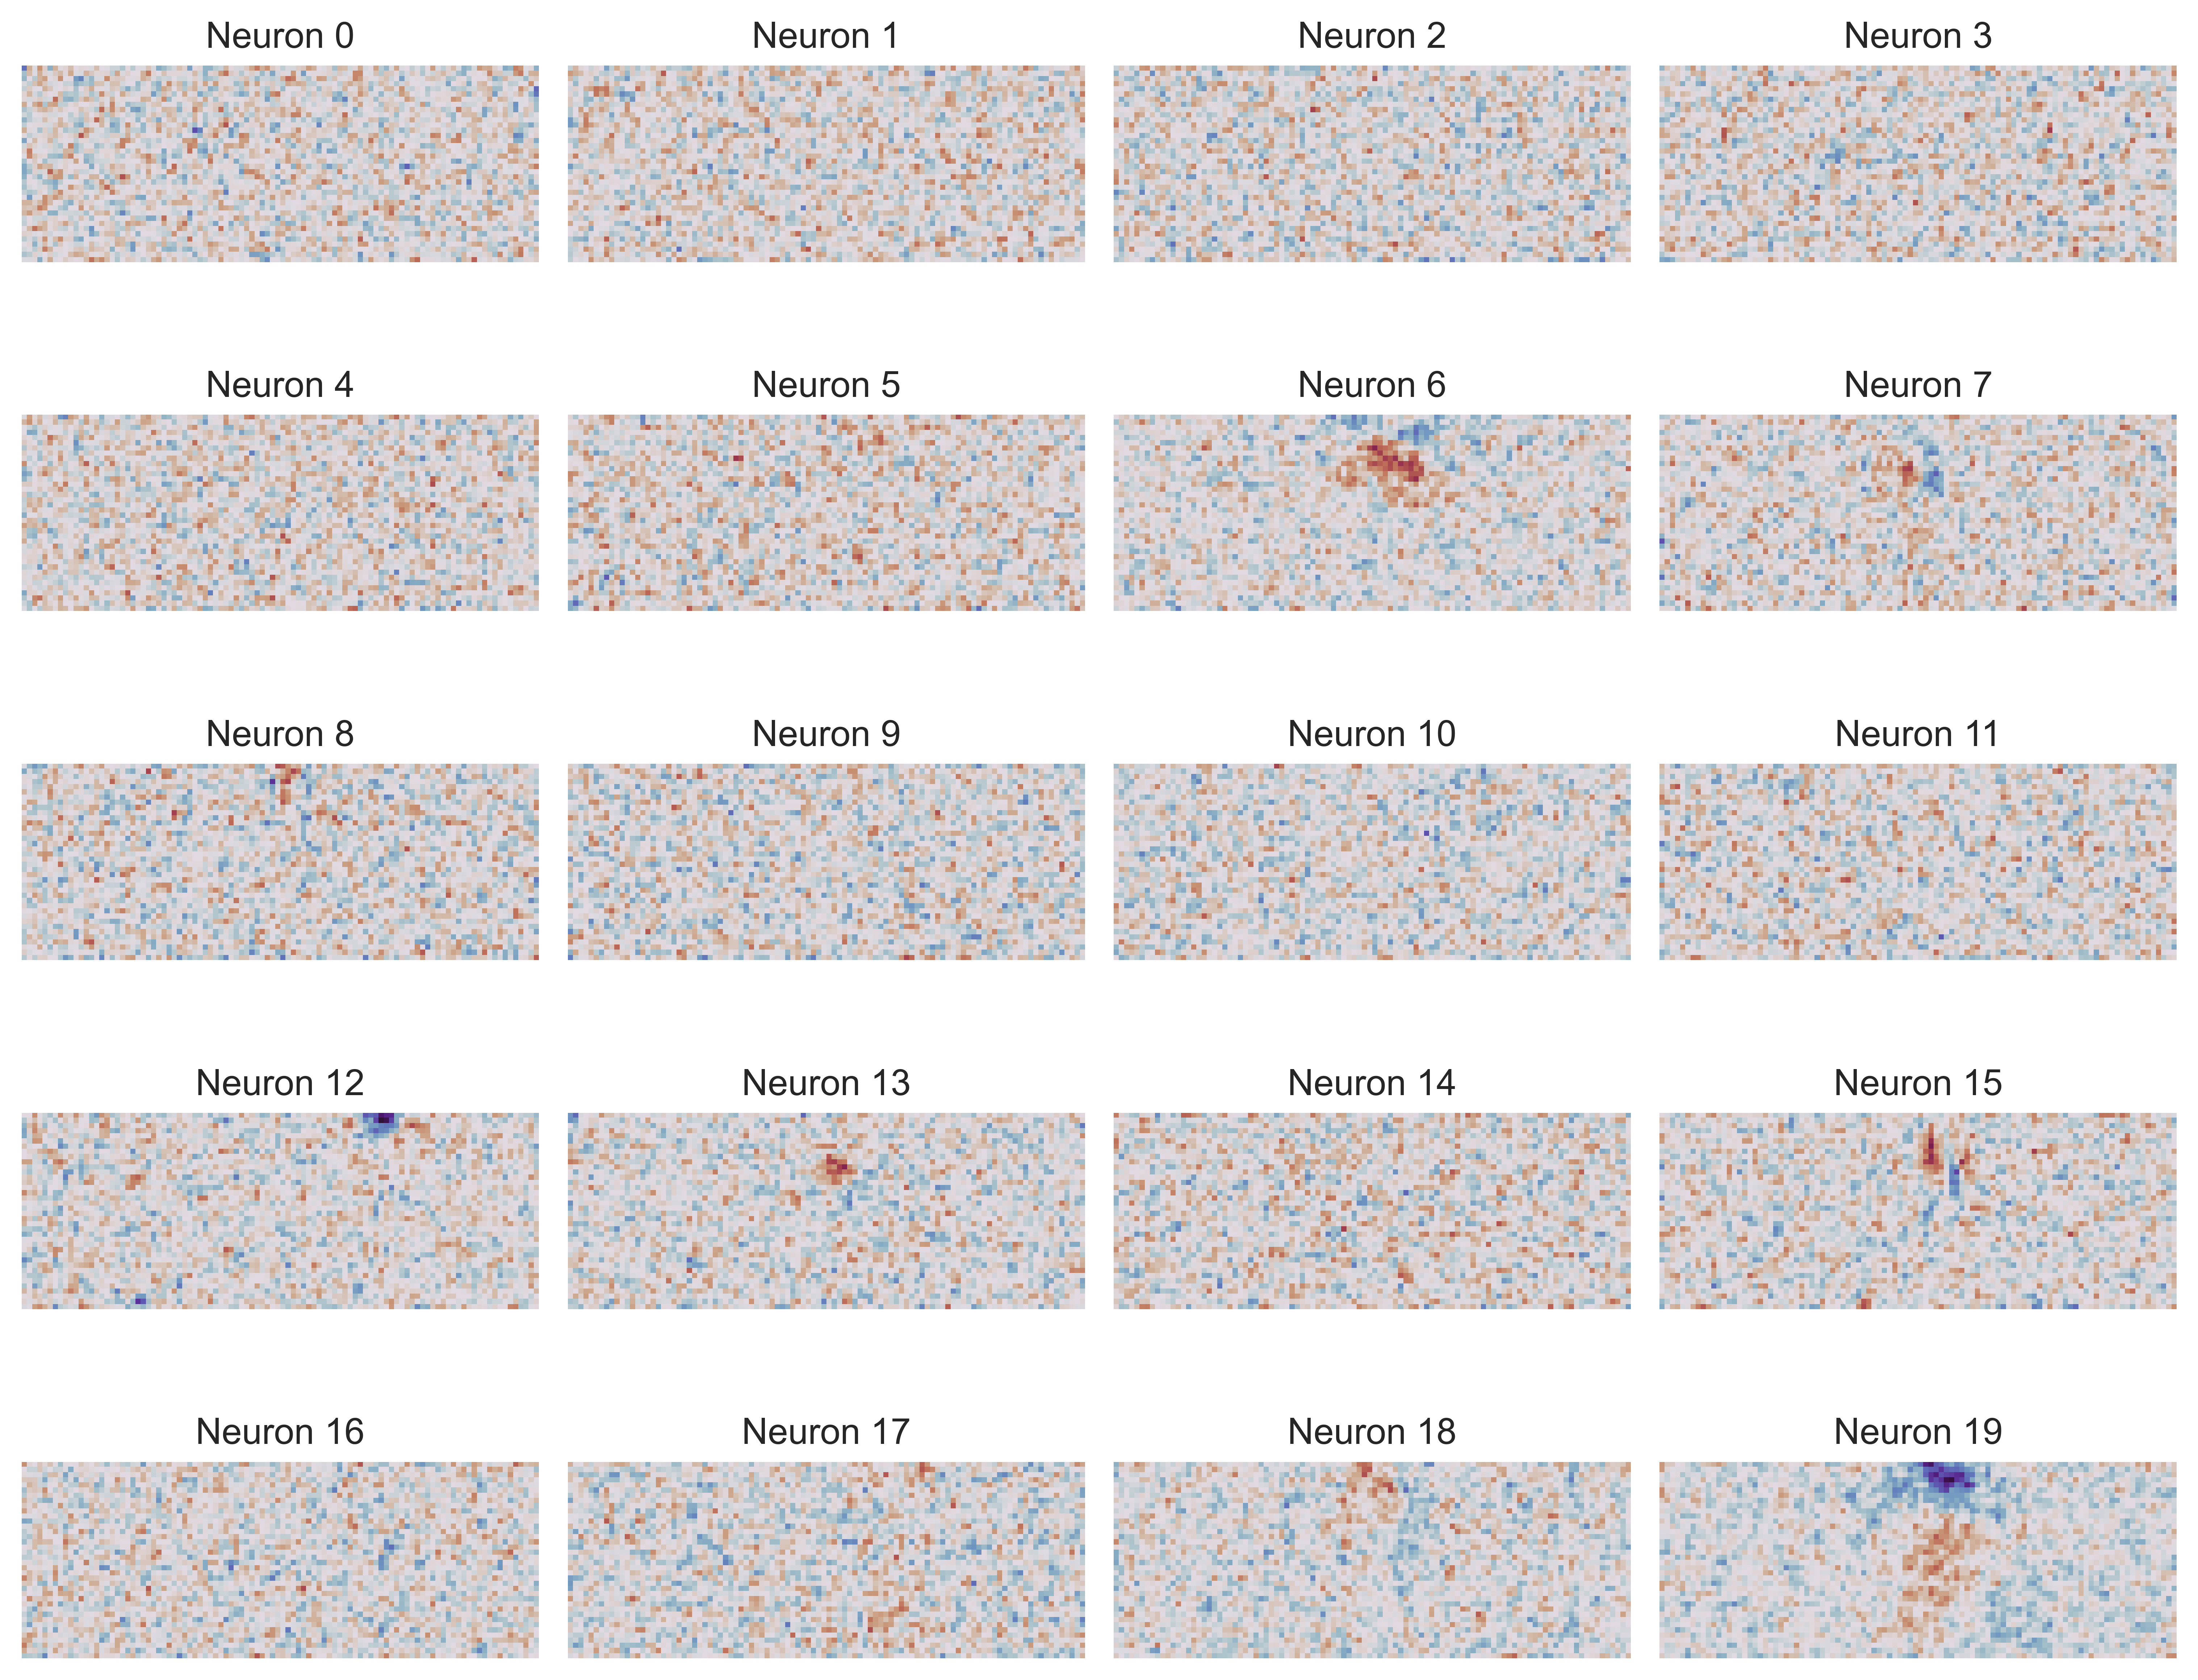

In [4]:
loader = SpikeLoader.from_hdf5(path_loader)
rf = ReceptiveField(loader.img_dim, lamda=1.1)
rf.fit_neuron(loader.imgs_stim, loader.S)
rf.plot()
rf.save_append(path_loader, overwrite_group=True)

### Denoise

We use PCA to denoise the RFs. However, the location of the RFs vary across the visual cortex and linear models are not translation and rotation-invariant. Therefore, we split the visual cortex into blocks and perform PCA separately for each block.

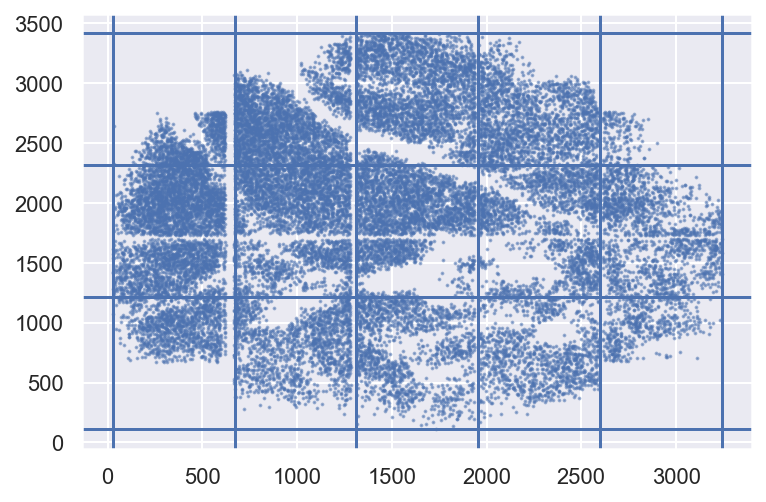

In [5]:
from pathlib import Path
import numpy as np

rf_pcaed = gen_rf_rank_regional(loader, rf, xy_div=(5, 3), plot=True)

path_loader = Path(path_loader)
np.save(path_loader.parent / (path_loader.stem + "rf_pcaed.npy"), rf_pcaed)